# PREDICTIVE MODELLING - Bank Churn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analyis

In [3]:
# load data in pd dataframe
df = pd.read_csv("Churn_Modelling.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# remove not important columns for modelling
df = df.drop(columns=["RowNumber","CustomerId","Surname"],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


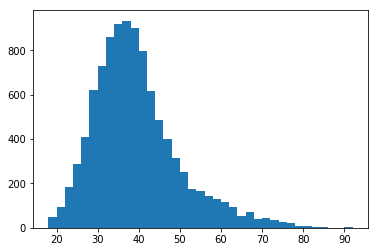

In [9]:
# deciding if "Age" variable is significant for determining the response "Exited"

bin_edges = np.arange(df['Age'].min(), df['Age'].max()+1, 2)
plt.hist(data = df, x = 'Age', bins = bin_edges); 

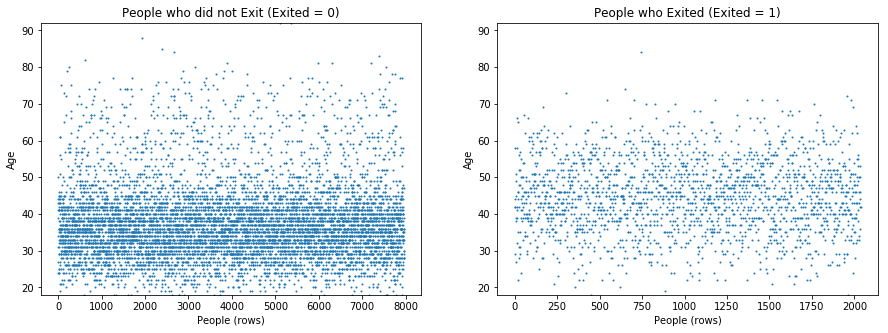

In [10]:
plt.figure(figsize = [15, 5])

# histogram on left: people who did not exit
plt.subplot(1, 2, 1)
plt.scatter(x=range(len(list(df["Age"][df["Exited"]==0]))),y=df["Age"][df["Exited"]==0],s=1);
plt.ylabel("Age");
plt.xlabel("People (rows)");
plt.title("People who did not Exit (Exited = 0)");
plt.ylim(18, 92);

# histogram on right: people who exited
plt.subplot(1, 2, 2)
plt.scatter(x=range(len(list(df["Age"][df["Exited"]==1]))),y=df["Age"][df["Exited"]==1],s=1);
plt.ylabel("Age");
plt.xlabel("People (rows)");
plt.title("People who Exited (Exited = 1)");
plt.ylim(18, 92);

In [11]:
# difference din the mean age between who exited and who didn't exit
df["Age"][df["Exited"]==1].mean(), df["Age"][df["Exited"]==0].mean()

(44.8379970544919, 37.40838879819164)

In [12]:
# stratification of exiting by age range
age_strat = df.groupby(pd.cut(df["Age"],bins=[10,20,30,40,50,60,70,80,90,100]))
age_strat = round((age_strat.sum()["Exited"] / age_strat.size()),2)
age_strat

Age
(10, 20]     0.06
(20, 30]     0.08
(30, 40]     0.12
(40, 50]     0.34
(50, 60]     0.56
(60, 70]     0.31
(70, 80]     0.08
(80, 90]     0.10
(90, 100]    0.00
dtype: float64

Text(0.5,1,'people in different Age Groups that exited')

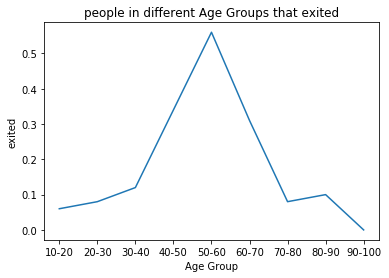

In [13]:
x = [str(i)+"-"+str(i+10) for i in range(10,91,10)]
plt.plot(x,age_strat.values)
plt.xlabel("Age Group")
plt.ylabel("exited")
plt.title("people in different Age Groups that exited")

In [14]:
# Visualization confirm that the age impacts significantly the probability of exiting
# Let's convert the variable "Age" from continuous to categorical
df["Age"] = pd.cut(df["Age"],bins=[10,20,30,40,50,60,70,80,90,100])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,"(40, 50]",2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,"(40, 50]",1,83807.86,1,0,1,112542.58,0
2,502,France,Female,"(40, 50]",8,159660.80,3,1,0,113931.57,1
3,699,France,Female,"(30, 40]",1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,"(40, 50]",2,125510.82,1,1,1,79084.10,0


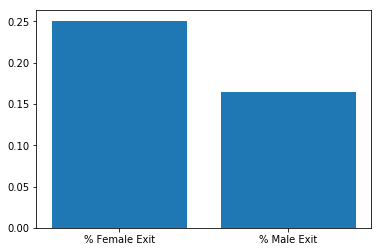

In [15]:
# deciding if "Gender" variable is significant for determining the response "Exited"

PercExitFem = len(df.query('Gender == "Female" and Exited == 1'))/len(df.query('Gender == "Female"'))
PercExitMal = len(df.query('Gender == "Male" and Exited == 1'))/len(df.query('Gender == "Male"'))

plt.bar(['% Female Exit', '% Male Exit'], [PercExitFem, PercExitMal]);

# Difference big enough to keep variable "Gender" in the dataset

In [16]:
# deciding if "Geography" variable is significant for determining the response "Exited"
# let's see which are the countries in the dataset
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

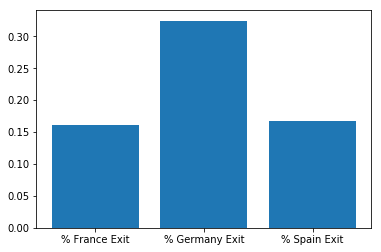

In [17]:
PercExitFra = len(df.query('Geography == "France" and Exited == 1'))/len(df.query('Geography == "France"'))
PercExitGer = len(df.query('Geography == "Germany" and Exited == 1'))/len(df.query('Geography == "Germany"'))
PercExitSpa = len(df.query('Geography == "Spain" and Exited == 1'))/len(df.query('Geography == "Spain"'))

plt.bar(['% France Exit', '% Germany Exit', '% Spain Exit'], [PercExitFra, PercExitGer, PercExitSpa]);

# Difference big enough to keep variable "Geography" in the dataset: in Germany the exit rate is much higher

In [18]:
# Let's convert the categorical columns in numerical columns through use of dummy variables for modeling
df = pd.get_dummies(df)
df.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,...,Gender_Male,"Age_(10, 20]","Age_(20, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]","Age_(60, 70]","Age_(70, 80]","Age_(80, 90]","Age_(90, 100]"
0,619,2,0.00,1,1,1,101348.88,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1,608,1,83807.86,1,0,1,112542.58,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,502,8,159660.80,3,1,0,113931.57,1,1,0,...,0,0,0,0,1,0,0,0,0,0
3,699,1,0.00,2,0,0,93826.63,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,850,2,125510.82,1,1,1,79084.10,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [19]:
# let's remove 1 column from each original categorical column (linear independence)
df = df.drop(columns=["Geography_France","Gender_Female","Age_(90, 100]"],axis=1)
df.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,"Age_(10, 20]","Age_(20, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]","Age_(60, 70]","Age_(70, 80]","Age_(80, 90]"
0,619,2,0.00,1,1,1,101348.88,1,0,0,0,0,0,0,1,0,0,0,0
1,608,1,83807.86,1,0,1,112542.58,0,0,1,0,0,0,0,1,0,0,0,0
2,502,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0,1,0,0,0,0
3,699,1,0.00,2,0,0,93826.63,0,0,0,0,0,0,1,0,0,0,0,0
4,850,2,125510.82,1,1,1,79084.10,0,0,1,0,0,0,0,1,0,0,0,0


In [20]:
# Separate features and label columns

features = df.drop(columns=['Exited'],axis=1)
label = df["Exited"]

## Let's create and train the predictive model

In [21]:
# let's divide the dataset in train and test portions (70%-30% respectively)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3)

In [22]:
# let's standardise the variable values for better computation
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

### Logistic Regression

In [23]:
# import, model and predict
from sklearn.linear_model.logistic import LogisticRegression
lr = LogisticRegression()

lr.fit(x_train, y_train)

lr_pred = lr.predict(x_test)

In [24]:
# evaluation of the model

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_test, lr_pred))

[[2261   91]
 [ 469  179]]


In [25]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2352
           1       0.66      0.28      0.39       648

   micro avg       0.81      0.81      0.81      3000
   macro avg       0.75      0.62      0.64      3000
weighted avg       0.79      0.81      0.78      3000



In [26]:
# cross validation
from sklearn.model_selection import cross_val_score

cv_logr = cross_val_score(lr, x_train, y_train, cv=10, n_jobs = -1).mean()
cv_logr

0.8302891140011072

## naive Bayes

In [27]:
# import, model and predict
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train, y_train)

nb_pred = nb.predict(x_test)

In [28]:
# evaluation of the model
print(confusion_matrix(y_test, nb_pred))

[[1882  470]
 [ 221  427]]


In [29]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      2352
           1       0.48      0.66      0.55       648

   micro avg       0.77      0.77      0.77      3000
   macro avg       0.69      0.73      0.70      3000
weighted avg       0.80      0.77      0.78      3000



In [30]:
# cross validation

cv_nb = cross_val_score(nb, x_train, y_train, cv=10, n_jobs = -1).mean()
cv_nb

0.7072946040997751

## K-Nearest Neighbors

In [31]:
# import, model and predict
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) 

knn.fit(x_train, y_train)

knn_pred = knn.predict(x_test)

In [32]:
# evaluation of the model
print(confusion_matrix(y_test, knn_pred))

[[2179  173]
 [ 396  252]]


In [33]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.88      2352
           1       0.59      0.39      0.47       648

   micro avg       0.81      0.81      0.81      3000
   macro avg       0.72      0.66      0.68      3000
weighted avg       0.79      0.81      0.79      3000



In [34]:
# cross validation
cv_knn = cross_val_score(knn, x_train, y_train, cv=10, n_jobs = -1).mean()
cv_knn

0.8261436040831571

## Support Vector Machine

In [35]:
# import, model and predict
from sklearn.svm import SVC

svc = SVC()

svc.fit(x_train, y_train)

svc_pred = svc.predict(x_test)

In [36]:
# evaluation of the model
print(confusion_matrix(y_test, svc_pred))

[[2280   72]
 [ 390  258]]


In [37]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2352
           1       0.78      0.40      0.53       648

   micro avg       0.85      0.85      0.85      3000
   macro avg       0.82      0.68      0.72      3000
weighted avg       0.84      0.85      0.83      3000



In [38]:
# cross validation
cv_svm = cross_val_score(svc, x_train, y_train, cv=10, n_jobs = -1).mean()
cv_svm

0.8557146349861355

## Random Forest

In [39]:
# import, model and predict
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(x_train, y_train)
forest_pred = forest.predict(x_test)

In [40]:
# evaluation of the model
print(confusion_matrix(y_test, forest_pred))

[[2252  100]
 [ 391  257]]


In [41]:
print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2352
           1       0.72      0.40      0.51       648

   micro avg       0.84      0.84      0.84      3000
   macro avg       0.79      0.68      0.71      3000
weighted avg       0.82      0.84      0.82      3000



In [42]:
# cross validation
cv_forest = cross_val_score(forest, x_train, y_train, cv=10, n_jobs = -1).mean()
cv_forest

0.8490013664750921

## XGBoost

In [43]:
# import, model and predict
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)

In [44]:
# evaluation of the model
print(confusion_matrix(y_test, xgb_pred))

[[2288   64]
 [ 376  272]]


In [45]:
print(accuracy_score(y_test, xgb_pred))

0.8533333333333334


In [46]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2352
           1       0.81      0.42      0.55       648

   micro avg       0.85      0.85      0.85      3000
   macro avg       0.83      0.70      0.73      3000
weighted avg       0.85      0.85      0.83      3000



In [47]:
# cross validation
cv_xgb = cross_val_score(xgb, x_train, y_train, cv=10, n_jobs = -1).mean()
cv_xgb

0.8628566792993455

## Ensemble method: Voting Classifier

In [48]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[('lr', lr), ('nb', nb), ('knn', knn), ('svc', svc), ('forest', forest), ('xgb', xgb)], voting='hard')

In [49]:
cv_ensemble = cross_val_score(ensemble, x_train, y_train, cv=10, n_jobs = -1).mean()
cv_ensemble

0.8575721865904683

### Algorithm Comparison

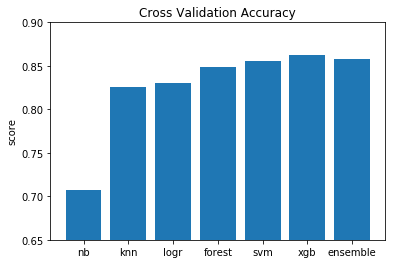

In [51]:
plt.bar(['nb','knn','logr','forest','svm','xgb','ensemble'], [cv_nb,cv_knn,cv_logr,cv_forest,cv_svm,cv_xgb, cv_ensemble]);
plt.ylim(0.65, 0.9);
plt.ylabel("score");
plt.title("Cross Validation Accuracy");